# Chapter 4. 분류

## 1. 분류(classification)의 개요

## 2. 결정 트리
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것입니다.
- 규칙 노드(Decision Node): 규칙 조건
- 리프 노드(Leaf Node): 결정된 클래스 값
- 새로운 규칙 조건마다 서브 트리(Sub Tree)가 생성

많은 규칙이 있다는 것은 곧 분류를 결정하는 방식이 더욱 복잡해진다는 얘기이고, 이는 곧 과적합으로 이어집니다. 즉, 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높습니다.

균일한 데이터 세트란 데이터 세트 안에 한 클래스가 많은 것을 말합니다. 이러한 데이터 세트의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미칩니다.

결정 노드는 정보 **균일도가 높은 데이터 세트를 먼저 선택**할 수 있도록 규칙 조건을 만듭니다. 즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식으로 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측합니다.

정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득(Information Gain)지수와 지니 계수가 있습니다.
- 정보 이득: 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮습니. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 **1 - 엔트로피 지수** 입니다. 정보 이득이 높은 속성을 기준으로 분할합니다.
- 지니 계수: 0이 가장 평등하고 1로 갈수록 불평등합니다. 지니 계수가 낮을 수록 데이터의 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할합니다.

**정보 이득이 높거나, 지니 계수가 낮은 조건**을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정합니다.

- 데이터가 균일하면 분류할 필요가 없다고 처음에 생각했는데, 피처가 여러 개로 되어있으면 균일한 데이터를 먼저 선택하여 분류하는 것이 더 쉽습니다. 예를 들어서, '색깔'피처 빨, 주, 노가 있고 '모양'피처 동그라미, 네모, 세모가 있는 경우, '색깔'피처가 빨간색으로 균일한 데이터인 경우, 더 쉽게 분류를 진행할 수 있을 것 입니다.

- 장점: 균일도를 기반으로 하고 있어서 알고리즘이 쉽고 직관적입니다. 시각화도 가능합니다. 균일도만 신경쓰면 되므로 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요가 없습니다.
- 단점: 과적합으로 정확도가 떨어집니다. -> 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 도움이 됩니다.


DecisionTreeClassifier(분류), DecisionTreeRegressor(회귀)의 파라미터
- min_samples_split(default= 2): 최소한의 샘플 데이터 수로 과적합을 제어하는데 사용, 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가, 1로 설정할 경우 분할되는 노드가 많아져서 과적합 가능성 증가
- min_samples_leaf: leaf node가 되기 위한 최소한의 샘플 수, 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우에는 작게 설정 필요
- max_features(default= None): 최적의 분할을 위해 고려할 최대 피처의 개수
    - int형: 대상 피처의 개수
    - float형: 전체 피처 중 대상 피처의 퍼센트
    - 'sqrt': 전체 피처 중 sqrt, 즉 $\sqrt{전체 피처 개수}$ 만큼 선정
    - 'auto': sqrt와 동일
    - 'log': 전체 피처 중 $log_{2}(전체 피처 개수)$로 선정
    - 'None': 전체 피처선정
- max_depth(default= None): 트리의 최대 깊이를 규정, None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_sample_split보다 작아질 때까지 계속 깊이를 증가시킴, 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요
- max_leaf_nodes: Leaf Node의 최대 개수

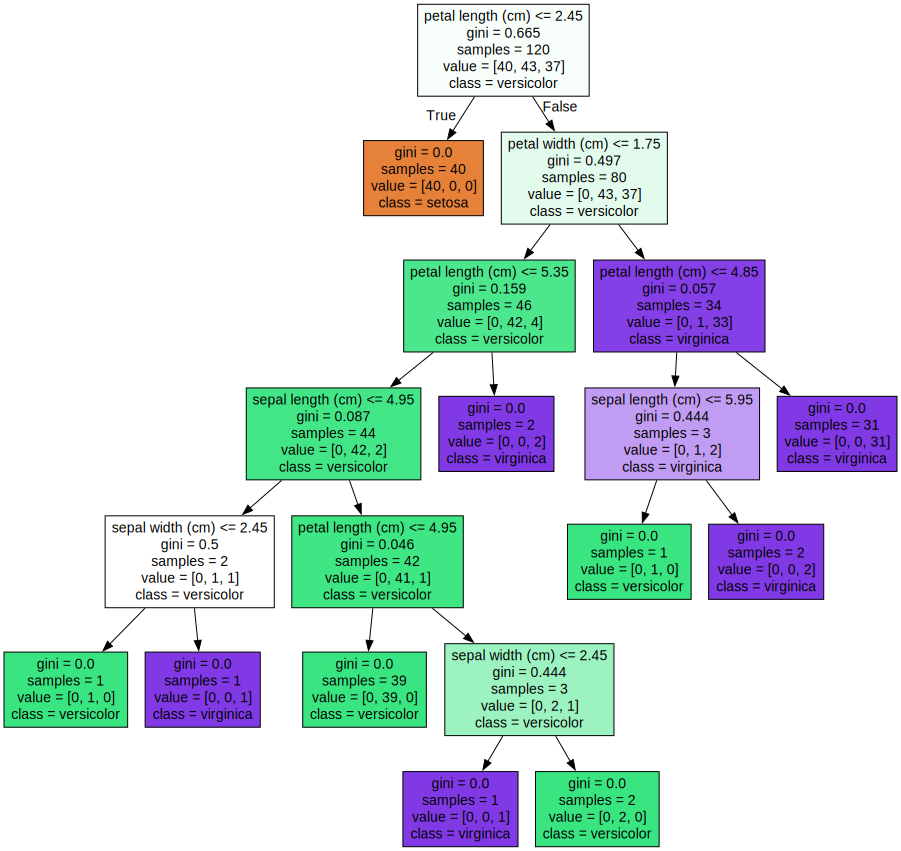

In [2]:
# Graphviz 패키지 사용

# export_graphviz()는 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 
# 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여줍니다.

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

dt_clf = DecisionTreeClassifier()

iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2)

dt_clf.fit(x_train, y_train)

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
    feature_names=iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

각 규칙에 따라 트리의 브랜치(branch) 노드와 말단 리프(leaf) 노드가 어떻게 구성됐는지 한눈에 알 수 있게 시각화돼 있습니다.

더 이상 자식 노드가 없는 노드는 리프 노드입니다. 리프 노드는 최종 클래스(레이블) 값이 결정되는 노드입니다.

자식 노드가 있는 노드는 브랜치 노드입니다.

- sepal length (cm) <= 6.95와 같이 맨 위에 있는 것이 자식 노드를 만들기 위한 규칙 조건입니다. 이 조건이 없으면 리프 노드입니다.
- gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수입니다.
- samples는 현 규칙에 해당하는 데이터 건수입니다.
- value = []는 클래스 값 기반의 데이터 건수입니다. 예를 들어 value = [41, 40, 39]라면 setosa가 41개, vesicolor 40개, virginica 39개로 데이터가 구성되어 있다는 의미입니다.

결정 트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들어 갑니다. 결국 매우 복잡한 규칙 트리가 만들어져 모델이 쉽게 과적합되는 문제점을 가지게 됩니다. 결국 매우 복잡한 규칙 트리가 만들어져 모델이 쉽게 과적합되는 문제점을 가지게 됩니다. **결정 트리는 이러한 이유로 과적합이 상당히 높은 ML 알고리즘입니다.** 

min_samples_splits는 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수입니다. value가 [0, 2, 1]과 같이 서로 상이한 클래스 값이 있어도 더 이상 분할하지 않고 리프 노드가 됩니다.

min_samples_splits=4, 즉 자식 노드로 분할하려면 최소한 샘플 개수가 4개는 필요한데, samples이 3개밖에 없으므로 더 이상 자식 규칙 노드를 위한 분할을 하지 않고 리프 노드가 됨을 알 수 있습니다.

Feature importances:
[0.02754082 0.02922146 0.5609024  0.38233533]

sepal length (cm) : 0.0275
sepal width (cm) : 0.0292
petal length (cm) : 0.5609
petal width (cm) : 0.3823


C:\Users\jinho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

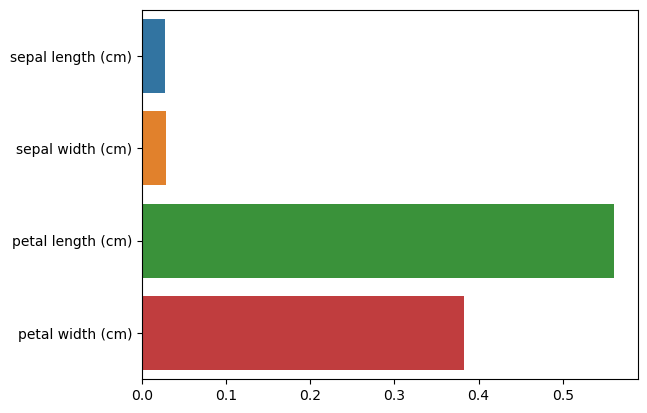

In [3]:
# feature_importances_ 속성으로 중요도 값 반환
# 값이 높을수록 해당 피처의 중요도가 높다
import seaborn as sns
import numpy as np

print("Feature importances:\n{0}".format(dt_clf.feature_importances_))
print()

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print("{0} : {1:.4f}".format(name,value))

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

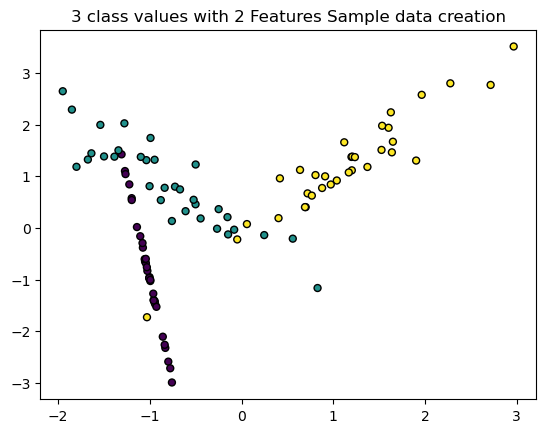

In [4]:
# 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 API 제공
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 class values with 2 Features Sample data creation")

x_feature, y_label = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                         n_classes=3, n_clusters_per_class=1)

plt.scatter(x_feature[:, 0], x_feature[:, 1], marker='o', c=y_label, s=25, edgecolors='k')

In [5]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\jinho\AppData\Local\Temp\ipykernel_44000\1016789203.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


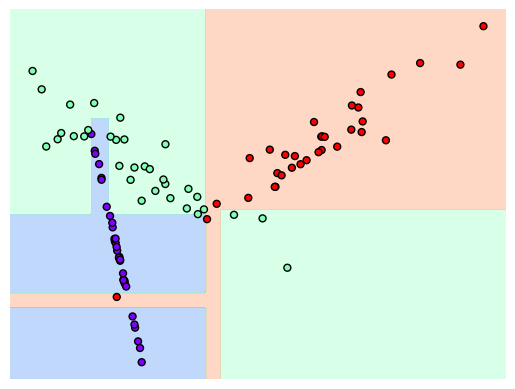

In [6]:
dt_clf = DecisionTreeClassifier().fit(x_feature, y_label)
visualize_boundary(dt_clf, x_feature, y_label)

이상치(Outlier) 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌습니다. 즉, 엄격한 분할 기준으로 인해 과적합이 일어난 상태입니다.

C:\Users\jinho\AppData\Local\Temp\ipykernel_44000\1016789203.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


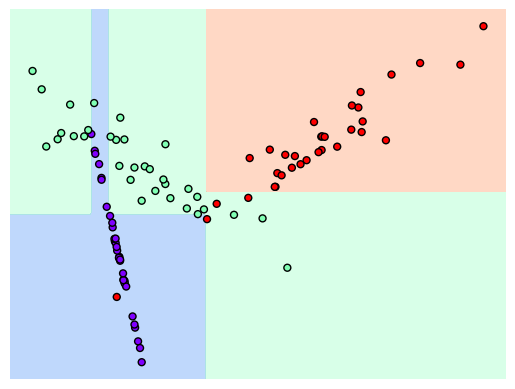

In [7]:
# min_samples_leaf의 조건
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(x_feature, y_label)
visualize_boundary(dt_clf, x_feature, y_label)

이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 확인할 수 있습니다. 

학습 데이터에만 지나치게 최적화된 분류 기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있습니다.

## 3. 앙상블 학습

앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법입니다.

대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 내고 있습니다.

보팅, 배깅, 부스팅 이렇게 세 가지로 나눌 수 있습니다.
- 보팅(Voting): 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것
- 배깅(Bagging): 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것 (Random Forest)
- 부스팅(Boosting): 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 학습과 예측을 진행하는 것입니다. (Gradient boost, XGBoost, LightGBM)

보팅 유형
- 하드 보팅(Hard Voting): 예측한 결괏값들중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정합니다. 다수결과 비슷합니다.
- 소프트 보팅(Soft Voting): 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정합니다. 일반적으로 사용됩니다.
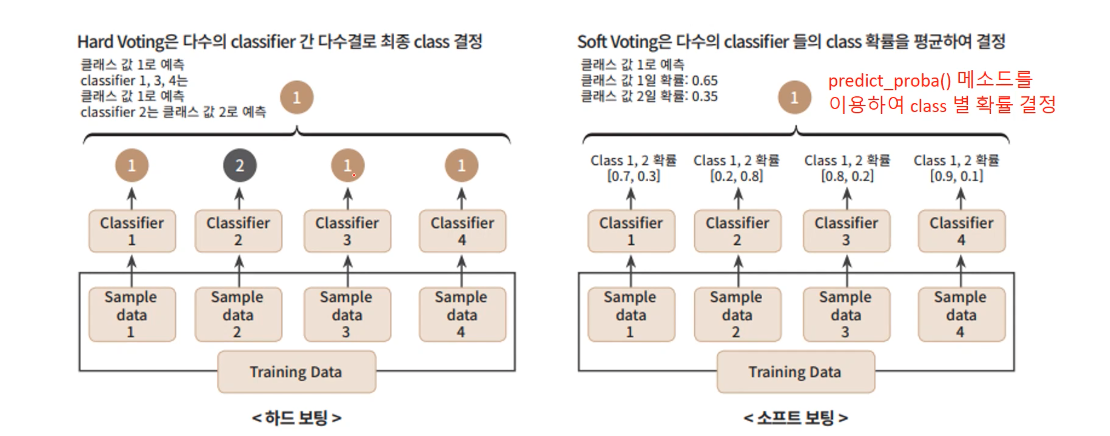

In [8]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer # 위스콘신 유방암 데이터 세트
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
# 학습 데이터 특성 확인
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
# 정답 분포 확인
target_series = pd.Series(cancer.target)
print(target_series.value_counts())

1    357
0    212
Name: count, dtype: int64


In [12]:
# 개별 모델
lr_clf = LogisticRegression(max_iter=5000)
knn_clf = KNeighborsClassifier(n_neighbors=8)

# voting= 이 soft면 soft voting, hard면 hard voting
# estimators= 는 튜플 형태로 입력되며 왼쪽은 이름, 오른쪽은 객체를 받는다
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, stratify=cancer.target)

vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
accuracy = accuracy_score(pred, y_test)

print("Voting 분류기 정확도: {0:.4f}".format(accuracy))


# 개별 모델 평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    class_name = classifier.__class__.__name__

    print("{0} 정확도: {1:.4f}".format(class_name, accuracy_score(y_test, pred)))


Voting 분류기 정확도: 0.9386
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9298


보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않습니다. 데이터의 특성과 분포 등 다양한 요건에 따라 오히려 기반 분류기 중 가장 좋은 분류기의 성능이 보팅했을 때보다 나을 수 있습니다.

배깅과 부스팅은 대부분 결정 트리 알고리즘을 기반으로 합니다. 수십 ~ 수천 개의 매우 많은 분류기를 결합해 다양한 상황을 학습하게 합니다.

## 4. 랜덤 포레스트

배깅(Bagging)은 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘 입니다.
대표적인 알고리즘은 랜덤 포레스트입니다.

랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측을 결정합니다.

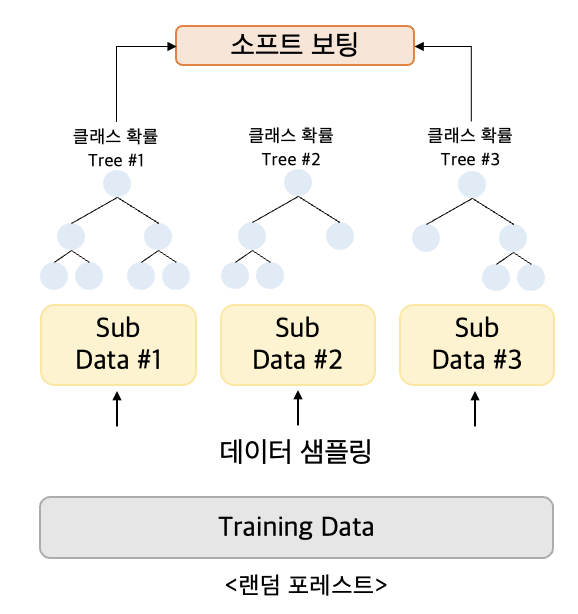

개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트입니다. 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑(bootstrapping) 분할 방식이라고 합니다.

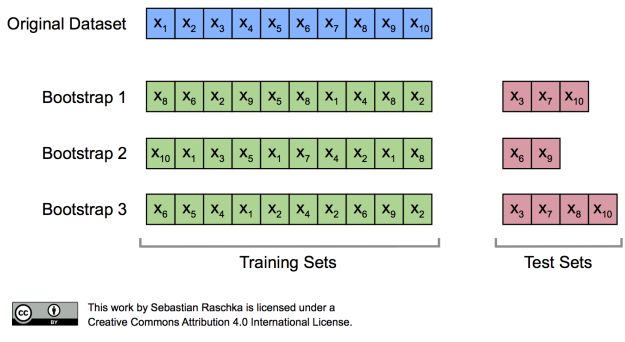

In [13]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']]\
    .apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)

    return new_feature_name_df
    
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./dataset/Human_Activity_Recognition/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./dataset/Human_Activity_Recognition/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./dataset/Human_Activity_Recognition/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./dataset/Human_Activity_Recognition/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./dataset/Human_Activity_Recognition/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [14]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

x_train, x_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print("랜덤 포레스트 정확도: {0:.4f}".format(accuracy))

랜덤 포레스트 정확도: 0.9247


트리 기반의 앙상블 알고리즘의 단점은 파라미터가 너무 많고, 이로 인한 튜닝 시간이 많이 소모됩니다.

랜덤 포레스트는 결정 트리에서 사용되는 하이퍼 파라미터와 같은 파라미터를 사용하여서 적은 편에 속합니다.

- n_estimators(default=10): 랜덤 포레스트에서 결정 트리의 개수를 지정합니다.
- max_features(default= 'auto'): 결정 트리에 사용된 것과 같이 최적의 분할을 위해 고려할 최대 피처의 개수를 뜻합니다.
- max_depth, min_samples_leaf와 같이 과적합을 개선하기 위해 사용되는 파라미터도 사용됩니다.

In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

# n_jobs=-1 설정시 모든 CPU 코어를 이용하여 학습 가능
rf_clf = RandomForestClassifier(n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(x_train, y_train)

print("최적의 파라미터: \n", grid_cv.best_params_)
print("최고 정확도: {0:.4f}".format(grid_cv.best_score_))

최적의 파라미터: 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 정확도: 0.9208


In [16]:
# 최적의 파라미터와 n_estimator 증가
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=12 , min_samples_leaf=18, min_samples_split=20, n_jobs=-1)
rf_clf1.fit(x_train, y_train)
pred = rf_clf1.predict(x_test)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9199


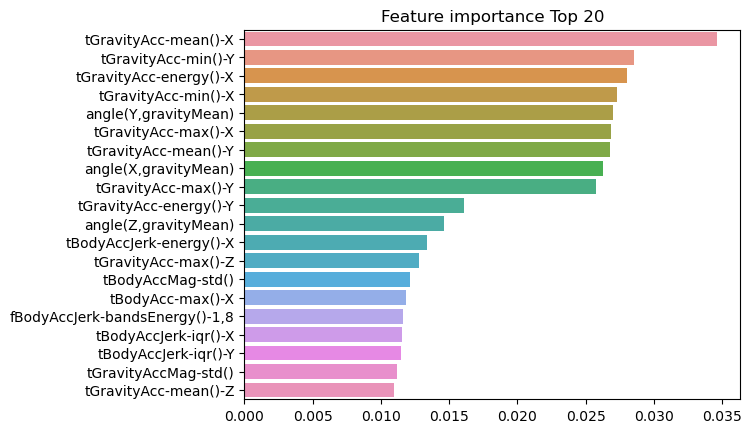

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure()
plt.title("Feature importance Top 20")
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 5. GBM(Gradient Boosting Machine)
부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식입니다.
- AdaBoost는 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘 입니다.
- GBM은 가중치 업데이트를 경사 하강법(Gradient Descent)를 이용하는 것이 큰 차이 입니다. 오류 값은 '실제값 - 예측값'입니다.

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
import time

start_time = time.time()

gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print("GBM 정확도: {0:.4f}".format(gb_accuracy))
print("GBM 수행시간: {0:.2f}".format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행시간: 0.64


일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 뛰어난 경우가 많습니다.
그러나 수행시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력도 필요합니다.

GBM 하이퍼 파라미터 및 튜닝
- loss(default= deviance): 경사 하강법에서 사용할 비용 함수
- learning_rate(default= 0.1) GBM의 학습률
- n_estimators(default= 100): weak learner의 개수
- subsample(default= 1): weak learner가 학습에 사용하는 데이터의 샘플링 비율, 1은 전체 학습 데이터를 기반으로 학습한다는 의미

In [35]:
params = {'n_estimators':[100, 500], 'learning_rate':[0.05, 0.1]}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(x_train, y_train)
print("최적의 하이퍼 파라미터:\n", grid_cv.best_params_)
print("최고 예측 정확도: {0:.4f}".format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적의 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도: 0.9473


GBM은 과적합에도 강한 뛰어난 예측 성능을 가진 알고리즘입니다. 하지만 시간이 오래 걸린다는 단점이 있습니다.

## XGBoost(eXtra Gradient Boost)

XGBoost는 GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규체(Regularization) 부재 등의 문제를 해결해서 매우 각광 받고 있습니다. 특히 병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습을 완료할 수 있습니다.
- 뛰어난 예측 성능
- GBM 대비 빠른 수행 시간
- 과적합 규제(Regularization)
- 나무 가지치기(Tree pruning): 더 이상 긍정 이득이 없는 분할을 가지치기
- 자체 내장된 교차 검증
- 결손값 자체 처리

### 파이썬 wrapper XGBoost 하이퍼 파라미터
- 일반 파라미터: 스레드 개수나 silent모드 등의 선택을 위한 파라미터, 디폴트 파라미터 값을 바꾸는 경우는 거의 없습니다.
- 부스터 파라미터: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지정합니다.
- 학습 태스크 파라미터: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터입니다.

- 주요 일반 파라미터
    - booster: gbtree(tree based model, default), gblinear(linear model)
    - silent(default= 0): 출력 메세지를 나타내고 싶지 않으면 1
    - nthread: CPU의 실행 스레드 개수 조정, default는 모두 사용

- 주요 부스터 파라미터
    - eta(default= 0.3, alias: learning_rate): learning_rate. 파이썬 래퍼는 0.3, 사이킷런 래퍼는 0.1이 default
    - num_boost_rounds: GBM의 n_estimators와 같은 파라미터
    - min_child_weight(default= 1): 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합
    - gamma(default= 0, alias: min_split_loss): 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값. 해당 값보다 큰 손실이 감소된 경우에 리프 노드를 분리합니다. 값이 클수록 과적합 감소 효과
    - max_depth(default= 6): 트리 기반 알고리즘 max_depth와 같음. 0이면 깊이 제한x
    - sub_sample(default= 1): GBM의 subsample과 동일. 트리가 커져서 과적합되는 것을 제어하기 위해 데이터의 샘플링하는 비율을 지정
    - colsample_bytree(default= 1): GBM의 max_features와 유사. 트리 생성에 필요한 피처(칼럼)를 임의로 샘플링하는 데 사용
    - lambda(default= 0, alias: reg_lambda): L2 Regularization 적용 값. 값이 클수록 과적합 감소 효과
    - alpha(default= 0, alias: reg_alpha): L1 Regularization 적용 값. 값이 클수록 과적합 감소 효과
    - scale_pos_weight(default= 1): 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터

- 학습 태스크 파라미터
    - objective: 최솟값을 가져야할 손실 함수
    - binary:logistic: 이진 분류
    - multi:softmax: 다중 분류
    - multi:softprob: 개별 레이블 클래스의 해당되는 예측 확률을 반환
    - eval_metric: 검증에 사용되는 함수 정의, 기본값은 회귀-rmse, 분류-error


- 과적합 문제가 심각하다면
    - eta 값을 낮춥니다(0.01~0.1). eta값을 낮출 경우 num_round(n_estimator)는 높여줘야 합니다.
    - max_depth 값을 낮춥니다.
    - min_child_weight 값을 높입니다.
    - gamma 값을 높입니다.
    - subsample과 colsample_bytree를 조정하는 것도 트리가 복잡하게 생성되는 것을 막아 과적합에 도움이 됩니다.

조기 중단(Early Stopping): 예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간 개선

In [18]:
import xgboost as xgb
from xgboost import plot_importance

dataset = load_breast_cancer()
x_feature = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data=x_feature, columns= dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [19]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

x_train, x_test, y_train, y_test = train_test_split(x_feature, y_label, test_size=0.2)
print(x_train.shape, x_test.shape)

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64
(455, 30) (114, 30)


In [20]:
# DMatrix는 numpy 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label = y_test)

# 하이퍼 파라미터는 딕셔너리 형태로 입력
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100}

num_rounds=400

In [21]:
# early_stopping_rounds 파라미터를 설정하기 위해서는 eval_set과 eval_metric이 설정되어야 함
# eval_set: 성능 평가를 수행할 평가용 데이터 세트
# eval_metrics: 평가 세트에 적용할 성능 평가 방법. error, logloss

wlist = [(dtrain, 'train'), (dtest, 'test')]

xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds, 
                      early_stopping_rounds = 100, evals=wlist)

[0]	train-logloss:0.58813	test-logloss:0.55626
[1]	train-logloss:0.52121	test-logloss:0.49660
[2]	train-logloss:0.46597	test-logloss:0.44966
[3]	train-logloss:0.41869	test-logloss:0.41099
[4]	train-logloss:0.37814	test-logloss:0.37596
[5]	train-logloss:0.34389	test-logloss:0.34599
[6]	train-logloss:0.31256	test-logloss:0.31880
[7]	train-logloss:0.28550	test-logloss:0.29601
[8]	train-logloss:0.26160	test-logloss:0.27468
[9]	train-logloss:0.24045	test-logloss:0.25802
[10]	train-logloss:0.22145	test-logloss:0.24243
[11]	train-logloss:0.20444	test-logloss:0.22781
[12]	train-logloss:0.18889	test-logloss:0.21777
[13]	train-logloss:0.17471	test-logloss:0.20652
[14]	train-logloss:0.16250	test-logloss:0.19787
[15]	train-logloss:0.15181	test-logloss:0.18883
[16]	train-logloss:0.14094	test-logloss:0.17992
[17]	train-logloss:0.13203	test-logloss:0.17453
[18]	train-logloss:0.12355	test-logloss:0.16777
[19]	train-logloss:0.11593	test-logloss:0.16156
[20]	train-logloss:0.10929	test-logloss:0.15890
[2

In [22]:
# predict()는 예측 결과가 아닌 예측 결과를 추정할 수 있는 확률 값을 반환
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10], 3)) # 예측 확률값 표시

preds = [1 if x > 0.5 else 0 for x in pred_probs]
print("예측값 10개만 표시:", preds[:10])

[1.    1.    1.    1.    1.    0.999 0.998 0.999 0.    1.   ]
예측값 10개만 표시: [1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


In [23]:
from practice.custom_func import get_clf_eval

get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[31  3]
 [ 4 76]]
정확도: 0.9386, 정밀도: 0.9620, 재현율: 0.9500, F1: 0.9560, AUC: 0.9930


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

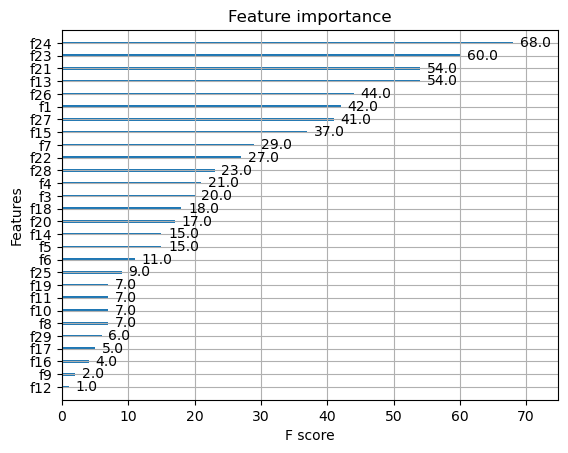

In [24]:
# 기본 평가 지표로 f1 score를 기반으로 각 피처의 중요도를 나타냄
fig, ax = plt.subplots()
plot_importance(xgb_model, ax=ax)

### 사이킷런 래퍼 XGBoost
하이퍼 파라미터 이름 변경
- eta -> learning_rate
- sub_sample -> subsample
- lambda -> reg_lambda
- alpha -> reg_alpha
- n_estimators, num_boost_round는 서로 동일한 파라미터, 사이킷런에서는 n_estimators 사용


In [25]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_Rate =0.1, max_depth=3)
xgb_wrapper.fit(x_train, y_train)
w_preds = xgb_wrapper.predict(x_test)
w_pred_proba = xgb_wrapper.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[31  3]
 [ 4 76]]
정확도: 0.9386, 정밀도: 0.9620, 재현율: 0.9500, F1: 0.9560, AUC: 0.9923


In [26]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_Rate =0.1, max_depth=3)
evals = [(x_test, y_test)]
xgb_wrapper.fit(x_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set = evals, verbose=True)
w_preds_100 = xgb_wrapper.predict(x_test)
w_pred_proba_100 = xgb_wrapper.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, w_preds_100, w_pred_proba_100)

[0]	validation_0-logloss:0.43441
[1]	validation_0-logloss:0.32974
[2]	validation_0-logloss:0.26541
[3]	validation_0-logloss:0.22948
[4]	validation_0-logloss:0.19822
[5]	validation_0-logloss:0.17728
[6]	validation_0-logloss:0.16252
[7]	validation_0-logloss:0.14472
[8]	validation_0-logloss:0.13445
[9]	validation_0-logloss:0.13721
[10]	validation_0-logloss:0.12829
[11]	validation_0-logloss:0.11688
[12]	validation_0-logloss:0.12296
[13]	validation_0-logloss:0.11726
[14]	validation_0-logloss:0.10935
[15]	validation_0-logloss:0.11592
[16]	validation_0-logloss:0.11745
[17]	validation_0-logloss:0.11116
[18]	validation_0-logloss:0.11122
[19]	validation_0-logloss:0.11716
[20]	validation_0-logloss:0.11853
[21]	validation_0-logloss:0.11421
[22]	validation_0-logloss:0.10883
[23]	validation_0-logloss:0.11218
[24]	validation_0-logloss:0.11192
[25]	validation_0-logloss:0.11118
[26]	validation_0-logloss:0.11468
[27]	validation_0-logloss:0.11901
[28]	validation_0-logloss:0.12153
[29]	validation_0-loglos

조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 큽니다. 아직 성능이 향상될 여지가 있음에도 불구하고 멈춰 버려서 충분한 학습이 되지 않아 예측 성능이 나빠집니다.

In [29]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_Rate =0.1, max_depth=3)
evals = [(x_test, y_test)]
xgb_wrapper.fit(x_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set = evals, verbose=True)
w_preds = xgb_wrapper.predict(x_test)
w_pred_proba = xgb_wrapper.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, w_preds, w_pred_proba)

[0]	validation_0-logloss:0.43441
[1]	validation_0-logloss:0.32974
[2]	validation_0-logloss:0.26541
[3]	validation_0-logloss:0.22948
[4]	validation_0-logloss:0.19822
[5]	validation_0-logloss:0.17728
[6]	validation_0-logloss:0.16252
[7]	validation_0-logloss:0.14472
[8]	validation_0-logloss:0.13445
[9]	validation_0-logloss:0.13721
[10]	validation_0-logloss:0.12829
[11]	validation_0-logloss:0.11688
[12]	validation_0-logloss:0.12296
[13]	validation_0-logloss:0.11726
[14]	validation_0-logloss:0.10935
[15]	validation_0-logloss:0.11592
[16]	validation_0-logloss:0.11745
[17]	validation_0-logloss:0.11116
[18]	validation_0-logloss:0.11122
[19]	validation_0-logloss:0.11716
[20]	validation_0-logloss:0.11853
[21]	validation_0-logloss:0.11421
[22]	validation_0-logloss:0.10883
[23]	validation_0-logloss:0.11218
[24]	validation_0-logloss:0.11192
[25]	validation_0-logloss:0.11118
[26]	validation_0-logloss:0.11468
[27]	validation_0-logloss:0.11901
[28]	validation_0-logloss:0.12153
[29]	validation_0-loglos

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

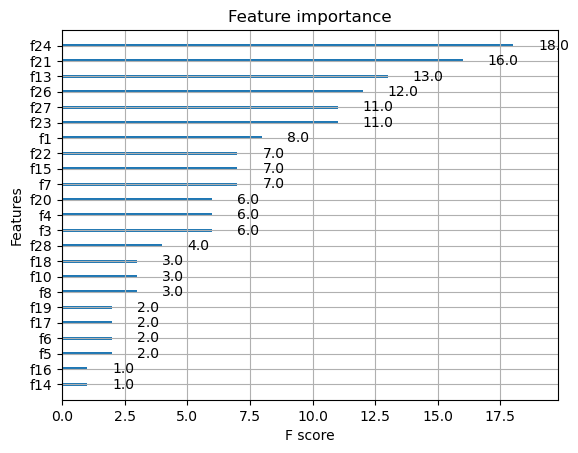

In [32]:
fig, ax = plt.subplots()
plot_importance(xgb_wrapper, ax=ax)

## 7. LightBGM

LightBGM의 가장 큰 장점은 XGBoost보다 학습에 걸리는 시간이 훨씬 적다는 점입니다. 예측 성능에는 별다른 차이가 없습니다.

단점으로는 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉽습니다.

리프 중심 트리 분할(Leaf Wise) 방식을 사용합니다.

기존의 대부분 트리 기반 알고리즘은 트리 깊이를 효과적으로 줄이기 위한 균형 트리 분할(Level Wise) 방식을 사용합니다. 즉, 최대한 균형 잡힌 트리를 유지함녀서 분할하기 때문에 트리의 깊이가 최소화될 수 있습니다. 오버피팅에 보다 더 강한 구조를 가질 수 있다고 할 수 있습니다. 반대로 균형을 맞추기 위한 시간이 필요하다는 상대적인 단점이 있습니다.

LightBGM은 최대 손실 값을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성됩니다. 하지만 이렇게 최대 손실값을 가지는 리프 노드를 지속적으로 분할해 생성된 규칙 트리는 학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있다는 것이 LightBGM의 구현 사상입니다.

- 더 빠른 학습과 예측 수행 시간
- 더 작은 메모리 사용량
- 카테고리형 피처의 자동 변환과 최적 분할(one-hot encoding등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행)

주요 파라미터
- num_iterations(default=100): 반복 수행하려는 트리의 개수를 지정. 크게 지정할수록 예측 성능이 높아질 수 있으나, 너무 크게 지정하면 과적합으로 성능 저하
- learning_rate(default=0.1): 0과 1사이 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값. 과적합 이슈와 학습 시간이 길어지는 부정적인 영향도 고려
- max_depth(default=-1): 트리 기반 알고리즘의 max_depth, 0보다 작은 값을 지정하면 깊이에 제한이 없음. Leaf wise 기반으로 깊이가 상대적으로 더 깊음
- min_data_in_leaf(default=20): 결정 트리의 min_samples_leaf와 같은 파라미터. 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수이며, 과적합을 제어하기 위한 파라미터
- num_leaves(default=31): 하나의 트리가 가질 수 있는 최대 리프 개수
- boosting(default=gbdt): 부스팅의 트리를 생성하는 알고리즘 기술
    - gbdt: 일반적인 그래디언트 부스팅 결정 트리
    - rf: 랜덤 포레스트
- bagging_fraction(default=1.0): 트리가 커져서 과적합되는 것을 제어하기 위해서 데이터를 샘플링하는 비율
- feature_fraction(default=1.0): 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율
- lambda_l2(default=0.0): L2 regularization 제어를 위한 값, 피처 개수가 많을 경우 적용, 값이 클수록 과적합 감소
- lambda_l1(default=0.0): L1 regularization 제어를 위한 값, 과적합 제어

Learning Task 파라미터
- objective: 최솟값을 가져야 할 손실함수

하이퍼 파라미터 튜닝 방안
- num_leaves: 개별 트리가 가질 수 있는 최대 리프 개수이고 LightBGM의 복잡도를 제어하는 주요 파라미터. 개수를 높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 모델 복잡도가 커져 과적합 영향도가 커짐
- min_data_in_leaf: 과적합을 개선하기 위한 중요한 파라미터. 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지
- max_depth: 깊이의 크기 제한. 과적합 개선
- learning_rate를 작게 하면서 n_estimators를 크게 하는 것은 가장 기본적인 튜닝 방안. 그러나 n_estimators를 너무 크게 하는 것은 과적합으로 오히려 성능이 저하될 수 있음

In [2]:
from lightbgm import LGBMClassifier

ModuleNotFoundError: No module named 'lightbgm'